In [3]:
# Making T-SNE Plot using house CSV and also using graph embeddings

### For graph Embeddings

from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

def getClassnameFromID(train_label):    
    ActivityIdList = config['ActivityIdList']
    train_label = [x for x in ActivityIdList if x["id"] == int(train_label)]
    return train_label[0]['name']


num_classes = 15

house = pd.read_csv('../../../../Research/data/all_houses/all_house_raw_graph_embedding.csv')

# house_columns = house.columns
# norm = MinMaxScaler().fit(house.iloc[:, :-1])
# house.iloc[:, :-1] = norm.transform(house.iloc[:, :-1])


#!/usr/bin/env python
config = {
"learning_rate" : 0.0001,
"num_epochs" : 150,
"decay" : 1e-5,
"input_dim" : 48,
"hidden_dim" : 64,
"layer_dim" : 1,
"output_dim" : 16,
"seq_dim" : 2,
"batch_size" :8,
"split_ratio" : 0.5,
"num_workers":4,
"accumulation_steps": 1,
"no_of_subset":30 ,
"subset_overlap_length": 2 ,
"resize_width": 120,
"resize_height": 97,
"image_width": 663,
"image_height": 446,
"ActivityIdList":
         [{'name': 'washDishes', 'id': 0},
         {'name': 'goToBed', 'id': 1},
         {'name': 'brushTeeth', 'id': 2},
         {'name': 'prepareLunch', 'id': 3},
         {'name': 'eating', 'id': 4},
         {'name': 'takeShower', 'id': 5},
         {'name': 'leaveHouse', 'id': 6},
         {'name': 'getDrink', 'id': 7},
         {'name': 'prepareBreakfast', 'id': 8},
         {'name': 'getSnack', 'id': 9},
         {'name': 'idle', 'id': 10},
         {'name': 'grooming', 'id': 11},
         {'name': 'prepareDinner', 'id': 12},        
         {'name': 'relaxing', 'id': 13},
         {'name': 'useToilet', 'id': 14}],

"merging_activties" : {
        "loadDishwasher": "washDishes",
        "unloadDishwasher": "washDishes",
        "loadWashingmachine": "washClothes",
        "unloadWashingmachine": "washClothes",
        "receiveGuest": "relaxing",
        "eatDinner": "eating",
        "eatBreakfast": "eating",
        "getDressed": "grooming",
        "shave": "grooming",
        "takeMedication": "idle",
        "leave_Home": "leaveHouse",
        "Sleeping": "goToBed",
        "Bed_to_Toilet": "useToilet",
        "Enter_Home": "idle",
        "Respirate": "relaxing",
        "Work": "idle",
        "Housekeeping": "idle",
        "Idle": "idle",
        "watchTV": "relaxing"
    },
 "ob_representation": False,
 "leaveOneHouseOut": True
}



house.head()

classes_index = []
for i in range(num_classes):  
    index = house[house['activity'] == getClassnameFromID(i)].index.values
    classes_index.append(index)    

activity_names = [x['name'] for x in config['ActivityIdList']]


house = pd.DataFrame(house)


import matplotlib.pyplot as plt
%matplotlib inline
import time

from sklearn.manifold import TSNE


df_labels = [x for x in house.loc[-1: , 'activity'].values]
activity_index_list = []
activity_index= []

num_classes = 15
for i in range(num_classes):
    activity_index = house[house['activity'] == getClassnameFromID(i)].index.values    
    activity_index_list.append(activity_index)




# df = house[house['activity'] == getClassnameFromID(i)]    
# Do not include start, end, activity..
house = house.iloc[:, 0:-1]    

time_start = time.time()
tsne = TSNE(n_iter=500)
tsne_results = tsne.fit_transform(house.values)
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    

t-SNE done! Time elapsed: 835.9235692024231 seconds


/home/harsh/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:75: UserWarning: Legend does not support [] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which

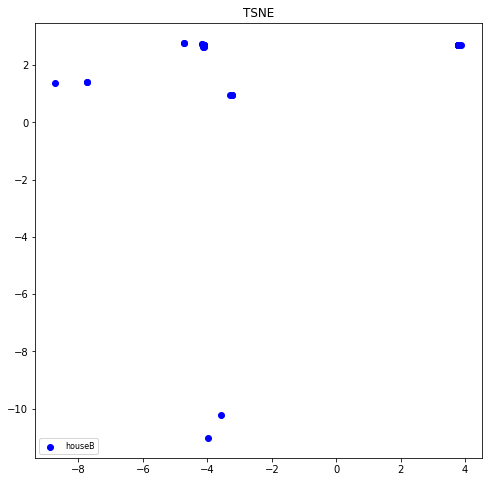

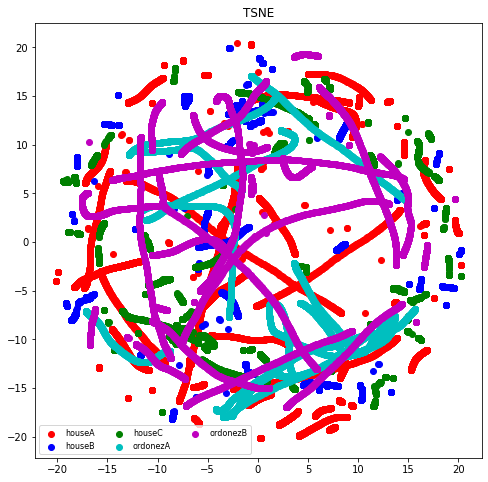

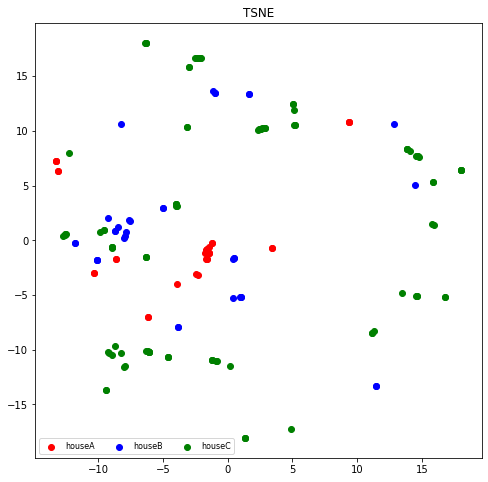

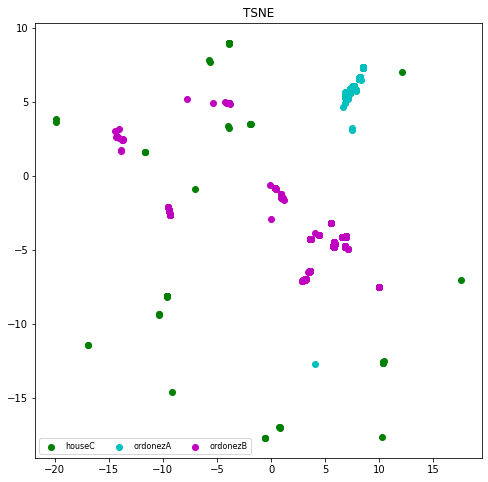

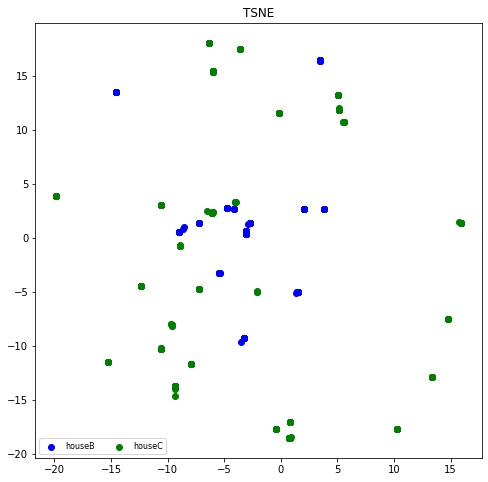

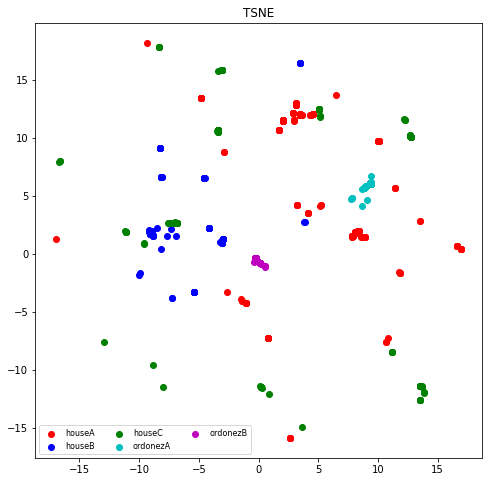

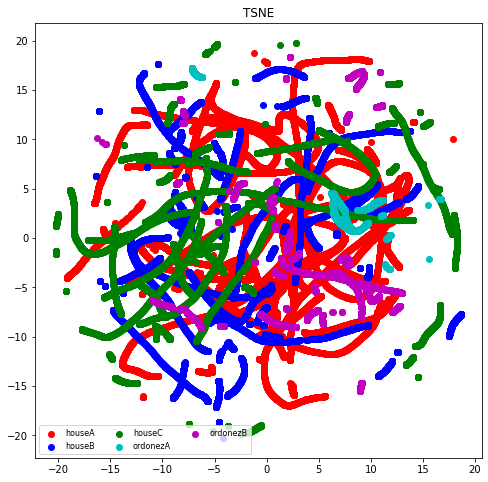

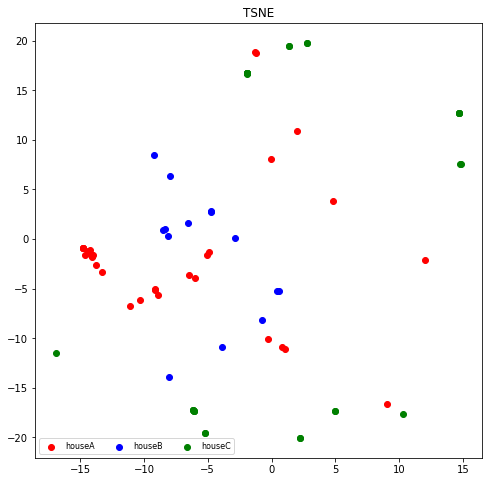

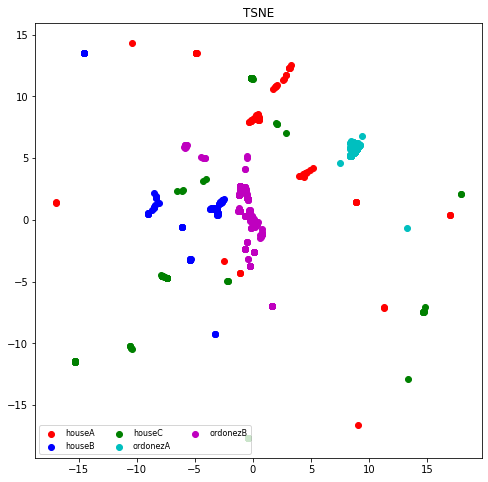

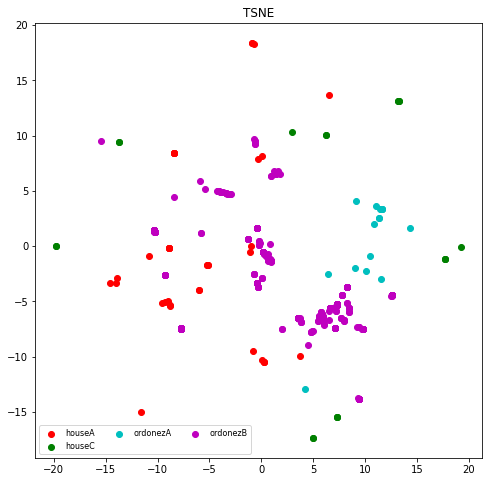

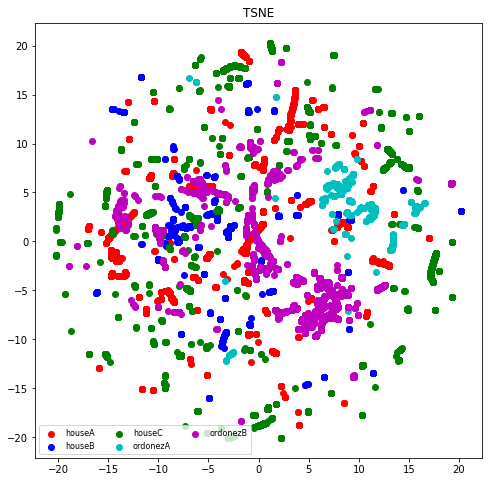

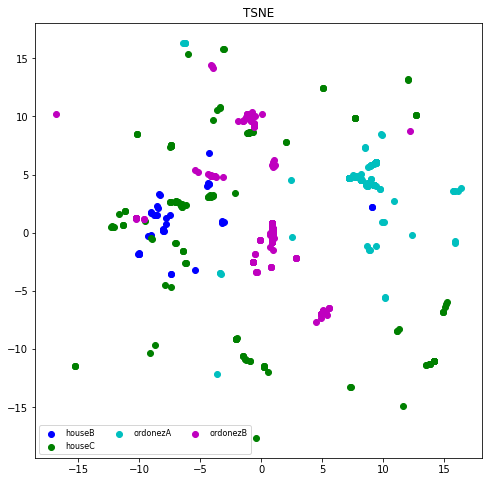

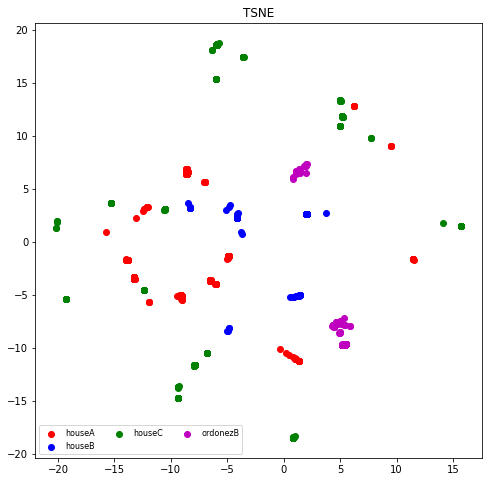

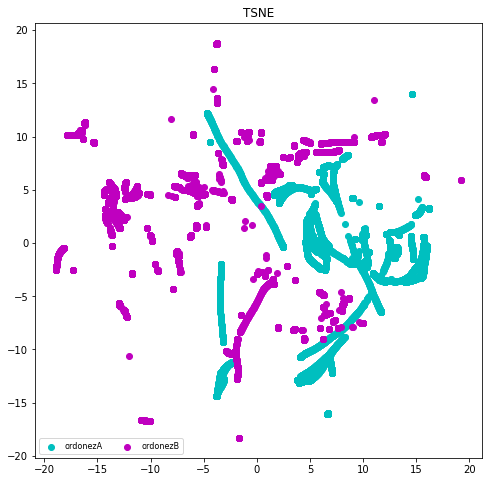

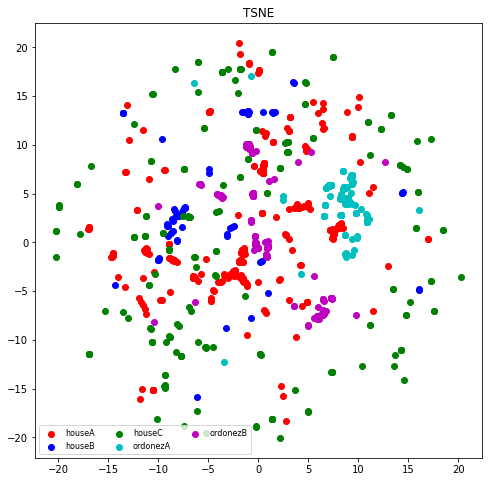

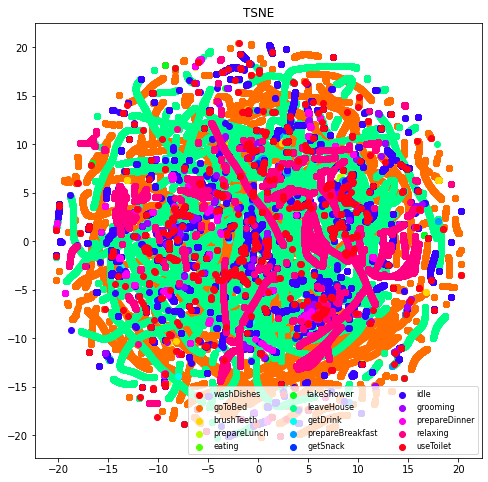

In [5]:
df_labels =  np.array(df_labels)

houseA = pd.read_csv('../../data/houseA/houseA.csv')
houseB = pd.read_csv('../../data/houseB/houseB.csv')
houseC = pd.read_csv('../../data/houseC/houseC.csv')
ordonezA = pd.read_csv('../../data/ordonezA/ordonezA.csv')
ordonezB = pd.read_csv('../../data/ordonezB/ordonezB.csv')
start = []
end = []
# Graph embedding order
# 'houseA', 'houseB', 'houseC', 'ordonezA'

allHouseList = [len(ordonezB), len(houseB), len(houseC), len(houseA), len(ordonezA)]


uniqueIndex = []
for i, houseDatasetLength in enumerate(allHouseList):
    if i == 0:
        start.append(0)
        end.append(sum(allHouseList[:i + 1]))
#         uniqueIndex.append((0, sum(allHouseList[:i + 1])))
    else:
        start.append((sum(allHouseList[:i])))
        end.append(sum(allHouseList[:i + 1]))
#         uniqueIndex.append((sum(allHouseList[:i]), sum(allHouseList[:i + 1])))

# Get index of each class and use only those index while plotting.
for i in range(num_classes):    
    # Create the figure
    fig = plt.figure( figsize=(8,8))
    ax = fig.add_subplot(1, 1, 1, title='TSNE')
    
    houseA, houseB, houseC, ordonezA, ordonezB = [],[],[],[],[]
    
    # Create the scatter
    for j in activity_index_list[i]:
        if start[0] < j < end[0]:
            ordonezB.append(j)
        elif start[1] < j < end[1]:
            houseB.append(j)
        elif start[2] < j < end[2]:
            houseC.append(j)
        elif start[3] < j < end[3]:
            houseA.append(j)
        elif start[4] < j < end[4]:
            ordonezA.append(j)
              
    
    if houseA:
        houseA = ax.scatter(x=tsne_results[houseA,0], 
                   y=tsne_results[houseA,1],
                   color='r')
    if houseB:
        houseB = ax.scatter(x=tsne_results[houseB,0], 
                   y=tsne_results[houseB,1],
                   color='b')
    if houseC:
        houseC = ax.scatter(x=tsne_results[houseC,0], 
                   y=tsne_results[houseC,1],
                   color='g')
    if ordonezA:
        ordonezA = ax.scatter(x=tsne_results[ordonezA,0], 
                   y=tsne_results[ordonezA,1],
               color='c')
    if ordonezB:
        ordonezB = ax.scatter(x=tsne_results[ordonezB,0], 
               y=tsne_results[ordonezB,1],
               color='m')

    plt.legend((houseA, houseB, houseC, ordonezA, ordonezB),
       ('houseA', 'houseB', 'houseC', 'ordonezA', 'ordonezB'),
       scatterpoints=1,
       loc='lower left',
       ncol=3,
       fontsize=8)
    
    axes = plt.gca()
    
#     axes.set_xlim(np.min(tsne_results[activity_index_list[i],0]) ,  np.max(tsne_results[activity_index_list[i],0]) )
#     axes.set_ylim( np.min(tsne_results[activity_index_list[i],1]) ,  np.max(tsne_results[activity_index_list[i],1]) )
    plt.savefig('./images/all_house/graph_embedding_one_house_out/'+ getClassnameFromID(i))        

house.head()

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)



    
# # # Create the figure
fig = plt.figure( figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, title='TSNE')
house_scatter = []

np.random.seed(seed=1)
c = np.random.rand(num_classes,)

cmap = get_cmap(num_classes)

for i in range(num_classes):  
    house_scatter.append(ax.scatter(x=tsne_results[classes_index[i],0], 
               y=tsne_results[classes_index[i],1], c= cmap(i)))

plt.legend((house_scatter),
       (activity_names),
       scatterpoints=1,
       loc='lower right',
       ncol=3,
       fontsize=8)

# axes = plt.gca()

# #     axes.set_xlim(np.min(tsne_results[activity_index_list[i],0]) ,  np.max(tsne_results[activity_index_list[i],0]) )
# #     axes.set_ylim( np.min(tsne_results[activity_index_list[i],1]) ,  np.max(tsne_results[activity_index_list[i],1]) )
plt.savefig('./images/all_house/graph_embedding_one_house_out/all_activties')    